
# Bias and variance
We will discuss two common problems in machine learning model development.
1. High bias
2. High variance




# High bias: 
    This problem will occur when the algorithm is NOT fitting the training data properly. 
    In other words, this means that the model is missing relevant relations between the input features and the predicted output.
    As one can guess, this model will perform poorly on the training data itself, as well as unseen data. 
    This problem is also called underfitting. 
    The training error is the error of model measured on the data used to train your model.

# High variance: 
    This problem will occur when the algorithm fits the training data perfectly. 
    In other words, this means that the model is bad at generalizing. 
    As one can guess, this model will perform poorly on unseen data. This problem is also called overfitting. 
    The generalization error is the error measured on previously unseen data for your model.

# High Bias Problem Identification:
High bias problem has following characteristics:
1. Training error is lower than Generalization error with a small margin.
2. Training error is higher than the acceptable Generalization error shown with dashed line.
3. Generalization error is higher than the acceptable Generalization error shown with dashed line.

# High Bias Solution:
1. We need to add more features to the training data. Adding more features may increase the separation between classes.
2. We need to increase model complexity. This can be implemented by using non-linear models like logistic regression or K-nearest neighbor.
3. Boosting can be used to create a collection of models. More than one model is learned sequentially, 
with early models fitting simple models to the data and then analyzing data for errors.
Consecutive models are fit, and the goal is to improve the accuracy from the previous model. 
Boosting can be thought as a collection of multiple models working in sequence.

# High Variance Problem Identification:
High variance has the following characteristics:
1. Training error is lower than generalization error with a large margin.
2. Training error is lower than the acceptable generalization error (shown with the dashed line).
3. Generalization error is higher than the acceptable generalization error (shown with dashed line).

# High Variance Solution:
1. We need to add more training data. As you can see, by adding more data the two errors will tend to converge.
2. We need to reduce model complexity. One of the ways could be by increasing regularization to penalize more complex solutions.
3. Bagging can be used, in which we create several subsets of data from randomly-chosen training samples. 
Each collection of subset data is used to train a different model. So we get an ensemble of many different models. 
Then we take the average of all the predictions from all the models and use it as final prediction. 
Bagging can be thought as a collection of parallel models.


# Example code for high bias and high variance with regression



In [22]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

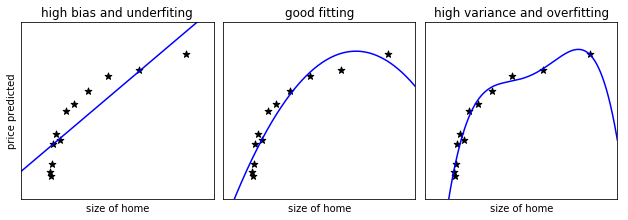

In [24]:
n_samples = 12
def generator_function(x, err=0.5):
    return np.random.normal(10 - 1. / (x + 0.1), err)

np.random.seed(0)
x = 10 ** np.linspace(-2, 0, n_samples)
y = generator_function(x)

x_test = np.linspace(-0.2, 1.2, 1000)

titles = ['high bias and underfiting','good fitting','high variance and overfitting']
degrees = [1, 2, 4]

fig = plt.figure(figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)

for i, d in enumerate(degrees):
    ax = fig.add_subplot(131 + i, xticks=[], yticks=[])
    ax.scatter(x, y, marker='*', c='k', s=50)

    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x[:, np.newaxis], y)
    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), '-b')

    ax.set_xlim(-0.2, 1.2)
    ax.set_ylim(0, 12)
    ax.set_xlabel('size of home')
    if i == 0:
        ax.set_ylabel('price predicted')

    ax.set_title(titles[i])

# Visualizing the training and validation sets



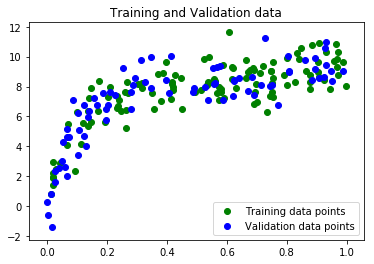

In [26]:
from sklearn.model_selection import train_test_split

n_samples = 200
test_size = 0.4
error = 1.0
    
np.random.seed(1)
x = np.random.random(n_samples)
y = generator_function(x, error)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)

plt.figure(figsize=(6, 4))
plt.scatter(x_train, y_train, color='green', label='Training data points')
plt.scatter(x_test, y_test, color='blue', label='Validation data points')
plt.title('Training and Validation data')
plt.legend(loc='best')